# Data Preprocessing

## Setup

In [1]:
from project_utils import *

%reload_ext autoreload
%autoreload 2

## Load Source Data

In [2]:
from SatelliteImageData import *

data_root_dir = '../../datasets/dstl-satellite-imagery-feature-detection/'
img_data = SatelliteImageData(data_root_dir)

## Check Loaded Source data

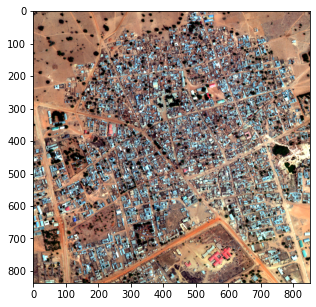

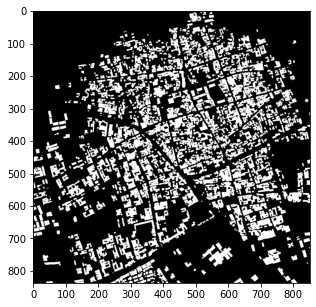

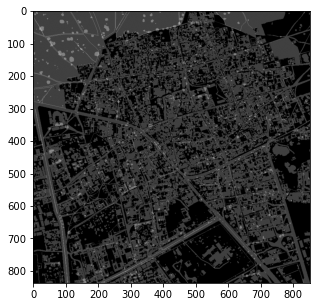

In [3]:
import numpy as np

temp_img_id = '6120_2_2'

temp_img = img_data.get_visual_m_band_img(temp_img_id)
temp_stacked_masks = img_data.get_stacked_masks(np.shape(temp_img)[0:2], temp_img_id)

display_rgb_img(temp_img)
display_mask(temp_stacked_masks[:,:,0])
display_stacked_masks(temp_stacked_masks)

## Check Class Distribution

In [4]:
class_counts = np.zeros(10)

for img_id in img_data.wkt_polygons.keys():
    img = img_data.get_visual_m_band_img(img_id)
    msks = img_data.get_stacked_masks(np.shape(img)[0:2], img_id)
    class_counts += np.sum(msks, axis=(0,1))

[ 756402.  281885.  158084.  559299. 2340818. 4958840.   92870.   33644.
    1100.    6516.]
[0.08231193 0.03067482 0.01720276 0.06086311 0.25472862 0.53962269
 0.01010615 0.00366115 0.0001197  0.00070907]


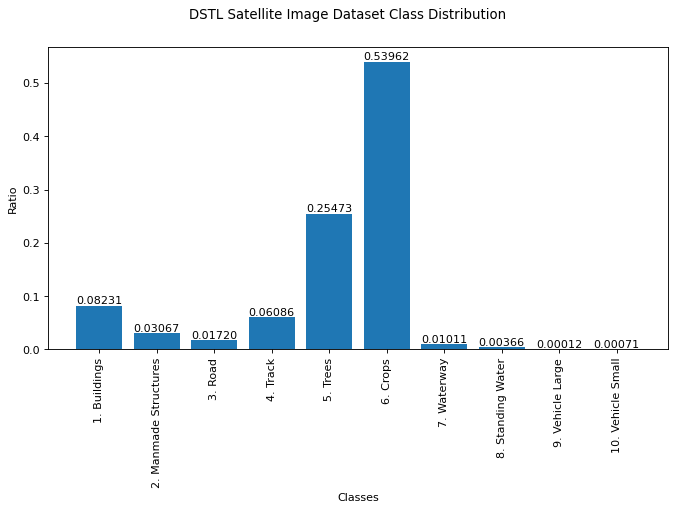

In [5]:
import matplotlib.pyplot as plt

skip_classes = []
temp_class_counts = np.delete(class_counts, skip_classes)

np.set_printoptions(suppress=True)
ratio = temp_class_counts/np.sum(temp_class_counts)
print(temp_class_counts)
print(ratio)

class_names = [
    "1. Buildings",
    "2. Manmade Structures",
    "3. Road",
    "4. Track",
    "5. Trees",
    "6. Crops",
    "7. Waterway",
    "8. Standing Water",
    "9. Vehicle Large",
    "10. Vehicle Small"
]


def autolabel(rects):
    """
    Author: Franck Dernoncourt
    Source: https://stackoverflow.com/questions/30228069/how-to-isplay-the-value-of-the-bar-on-each-bar-with-pyplot-barh
    
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%.5f' % height, ha='center', va='bottom')

fig = plt.figure(figsize=(10, 5), dpi=80)

plt.xlabel('Classes')
plt.ylabel('Ratio')
plt.suptitle('DSTL Satellite Image Dataset Class Distribution')

bars = plt.bar(
    range(len(temp_class_counts)), 
    ratio,
    tick_label=class_names
)

autolabel(bars)
plt.xticks(rotation=90)

plt.show()

In [6]:
weights = [round(w) for w in sum(temp_class_counts)/temp_class_counts*10]
weights = [round(w, 4) for w in weights/sum(weights)]

print(weights)
print(sum(weights))
print(sum([0.001, 0.0033, 0.0053, 0.0015, 0.0003, 0.0002, 0.0088, 0.0248, 0.8125, 0.1423]))

[0.0012, 0.0032, 0.0057, 0.0016, 0.0004, 0.0002, 0.0096, 0.0266, 0.8141, 0.1374]
1.0
1.0


## Generate Dataset

In [7]:
# img_data.generate_data_patches(image_size=(1024,1024), patch_size=(256,256))

400
6800
1008


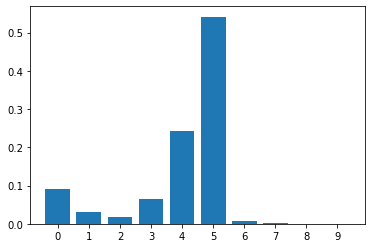

[ 979405.  328040.  185858.  687973. 2576219. 5757340.   70738.   35112.
    1249.    7376.]
[0.09214192 0.03086183 0.01748542 0.06472414 0.24236935 0.54164758
 0.00665499 0.00330332 0.00011751 0.00069393]


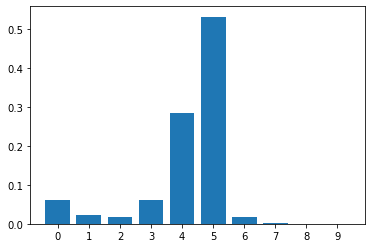

[ 76259.  28593.  21805.  76508. 357695. 665560.  22395.   3420.    190.
    802.]
[0.06085011 0.0228155  0.01739908 0.0610488  0.28541916 0.53107697
 0.01786987 0.00272895 0.00015161 0.00063995]


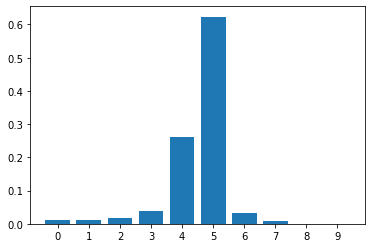

[ 15353.  14608.  22901.  52856. 367426. 873330.  44189.  10006.     45.
    300.]
[0.01095849 0.01042673 0.01634602 0.03772696 0.26225719 0.62335566
 0.03154073 0.00714197 0.00003212 0.00021413]


In [8]:
import random

labelled_patch_ids = list(np.load(img_data.processed_data_dir + 'labelled_patch_ids.npy'))
unlabelled_patch_ids = list(np.load(img_data.processed_data_dir + 'unlabelled_patch_ids.npy'))
balanced_unlabelled_patch_ids = list(np.load(img_data.processed_data_dir + 'balanced_unlabelled_patch_ids.npy'))
print(len(labelled_patch_ids))
print(len(unlabelled_patch_ids))
print(len(balanced_unlabelled_patch_ids))

random.seed(0)
random.shuffle(labelled_patch_ids)
splitted_id_list = split_list(labelled_patch_ids, split_ratio=(0.8, 0.1, 0.1))

for id_list in splitted_id_list:
    class_distribution = np.zeros(10)

    for tmp_id in id_list:
        loaded_masks = np.load(img_data.processed_data_dir + 'msks/{}.npy'.format(tmp_id))
        class_distribution += np.sum(loaded_masks, axis=(0,1))

    plt.bar(
        range(len(class_distribution)),
        class_distribution/sum(class_distribution),
        tick_label=range(len(class_distribution))
    )

    plt.show()

    print(class_distribution)
    print(class_distribution/sum(class_distribution))